170498071/170498071 [==============================] - 13s 0us/step


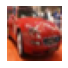

Class [1]


In [1]:
import random
import numpy as np
import keras as keras
import tensorflow as tf
from keras import regularizers
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Model, Sequential
from sklearn.metrics import accuracy_score
from keras.activations import sigmoid, softmax
from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.metrics import classification_report, mean_squared_error

from keras.datasets import cifar10
(Img_train, Lbl_train), (Img_test, Lbl_test) = cifar10.load_data()
X_train = Img_train.astype('float32')/255 ; X_test = Img_test.astype('float32')/255
Y_train = np_utils.to_categorical(Lbl_train) ; Y_test = np_utils.to_categorical(Lbl_test)

import matplotlib.pyplot as plt
plt.figure(figsize=[1,1]) ; plt.imshow(X_train[5,:,:,:]) ; plt.axis('off') ; plt.show() ; print('Class',Lbl_train[5])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0

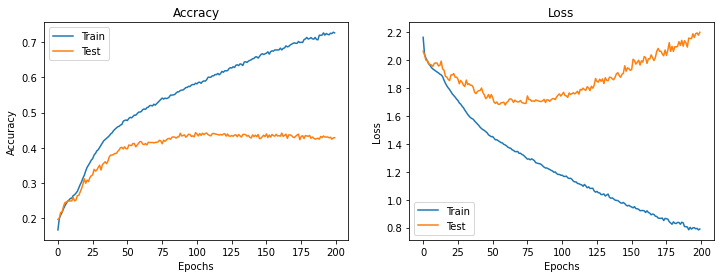

In [8]:
keras.backend.clear_session()
model = Sequential()
model.add(Input(shape = X_train.shape[1:]))
model.add(Flatten(name='flatten'))
model.add(Dense(32*16))
model.add(Activation('sigmoid'))
model.add(Dense(32*8))
model.add(Activation('sigmoid'))
model.add(Dense(32*4))
model.add(Activation('sigmoid'))
model.add(Dense(32*2))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(16))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=1, shuffle=False)
[test_loss, test_acc] = model.evaluate(X_test, Y_test) ; print("\nTest Loss =", test_loss) ; print("Test Accuracy =", test_acc)

def Plot (Model_history):
  ACC = Model_history.history['accuracy']
  ACC_val = Model_history.history['val_accuracy']
  Loss = Model_history.history['loss']
  Loss_val = Model_history.history['val_loss']
  print('\nMax accuracy in train data:', max(ACC), ', happened in epoch:', ACC.index(max(ACC))+1)
  print('Max accuracy in test data:', max(ACC_val), ', happened in epoch:', ACC_val.index(max(ACC_val))+1)
  print('Min loss in train data:', min(Loss), ', happened in epoch:', Loss.index(min(Loss))+1,)
  print('Min loss in test data:', min(Loss_val), ', happened in epoch:', Loss_val.index(min(Loss_val))+1,'\n')
  fig = plt.figure(figsize=(12, 4))
  plt.subplot(1,2,1) ; plt.plot(ACC) ; plt.plot(ACC_val) ; plt.xlabel('Epochs') ; plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test']) ; plt.title('Accracy')
  plt.subplot(1,2,2) ; plt.plot(Loss) ; plt.plot(Loss_val) ; plt.xlabel('Epochs') ; plt.ylabel('Loss')
  plt.legend(['Train', 'Test']) ; plt.title('Loss')
  plt.show()

Plot(history)

In [5]:
!pip install evaluate
!pip install datasets

import torch
import evaluate
from tqdm import tqdm
from datasets import load_dataset
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression

# Load CIFAR 10 data with format 'torch'
train = load_dataset('cifar10', split='train').with_format("torch")
test = load_dataset('cifar10', split='test').with_format("torch")
train_bn = DataLoader(train, batch_size=100)
test_bn = DataLoader(test,batch_size=100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install transformers

from transformers import BeitFeatureExtractor, BeitForImageClassification
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')
beit = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

# from transformers import AutoFeatureExtractor, BeitForMaskedImageModeling
# feature_extractor = AutoFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224-pt22k')
# beit = BeitForMaskedImageModeling.from_pretrained('microsoft/beit-base-patch16-224-pt22k')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
beit.to(device)
beit.eval()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading:   0%|          | 0.00/276 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414M [00:00<?, ?B/s]

BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (int

In [10]:
n_beit_layers = len(beit.beit.encoder.layer) # number of beit layers

def beit_output(data_bn,device):
    outputs = []
    labels =[]
    with torch.no_grad():
        for i, data in enumerate(tqdm(data_bn)):
            features = feature_extractor([i for i in data['img']], return_tensors='pt').to(device)
            output = beit(**features, output_hidden_states=True,return_dict=True)
            layer_output = []
            for i in range(n_beit_layers):
                l_output = output.hidden_states[i][:, 1:, :]
                layer_output.append(torch.mean(l_output,1))                
            outputs.append(torch.stack(layer_output))
            labels.append(data['label'])
    return torch.stack(outputs), torch.cat(labels) 

train_outputs, train_labels = beit_output(train_bn, device) 
test_outputs, test_labels = beit_output(test_bn, device)

# Linear classification
model = LogisticRegression(max_iter = 1000) ; result = []
emb_dim = train_outputs.shape[-1]

for i in tqdm(range(n_beit_layers)):
    model.fit(train_outputs[:,i,:].cpu().detach().numpy().reshape(-1,emb_dim), train_labels)
    pred = model.predict(test_outputs[:,i,:].cpu().detach().numpy().reshape(-1,emb_dim))
    metric = evaluate.load('accuracy')
    accuracy = metric.compute(predictions=pred, references=test_labels)
    result.append(accuracy['accuracy'])

print('\n')
for i in range(n_beit_layers): print(f'layer: {i}, accuracy : {result[i]}')

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  8%|▊         | 1/12 [04:09<45:42, 249.36s/it]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc



layer: 0, accuracy : 0.3018
layer: 1, accuracy : 0.5397
layer: 2, accuracy : 0.6647
layer: 3, accuracy : 0.7378
layer: 4, accuracy : 0.8068
layer: 5, accuracy : 0.8686
layer: 6, accuracy : 0.8978
layer: 7, accuracy : 0.9214
layer: 8, accuracy : 0.9379
layer: 9, accuracy : 0.957
layer: 10, accuracy : 0.9656
layer: 11, accuracy : 0.9686
